In [1]:
from multipletimeseriesforecasting.experiments.DatasetLoader import DatasetLoader
import os

In [2]:
parent = 'multipletimeseriesforecasting/preprocessed-data/'

path = os.path.join(parent, 'EnergyConsumptionFraunhofer/electrFraunhofer_daily.csv')

dl = DatasetLoader('EnergyConsumptionFraunhofer', path)

matrix_1 = dl.dataset_load_and_preprocess()
print(matrix_1)

# Mean daily consumption of energy in kWh of a customer's household in Spain
# from Jan 1 2019 - Dec. 31 2019

---------------------------------------------------
Dataset name:  EnergyConsumptionFraunhofer
Dataset contains missing values?  False
---------------------------------------------------
Dataset shape: (314, 365)
This dataset has 314 series, and each series has 365 time steps
Max value: 11.575375 , Min value: 0.0
[[0.10720833 0.14533333 0.453875   ... 0.262      0.049375   0.05383333]
 [0.119875   0.11254167 0.29775    ... 0.11616667 0.114875   0.11829167]
 [0.43283333 0.394375   0.532375   ... 0.26275    0.32554167 0.372625  ]
 ...
 [0.48408333 0.53516667 0.58883333 ... 0.34216667 0.37916667 0.34541667]
 [0.87645833 1.03104167 1.10508333 ... 0.73691667 1.05379167 0.946125  ]
 [0.10770833 0.043375   0.04141667 ... 0.03891667 0.07445833 0.127625  ]]


In [3]:
print(matrix_1.max())

11.575375


In [4]:
matrix_1.shape

(314, 365)

In [5]:
matrix_1[0].max()

0.9441666666666668

In [6]:
import numpy as np

In [7]:
def normalize(matrix):
    matrix_sc = np.empty([matrix.shape[0], matrix.shape[1]])
    for i in range(matrix.shape[0]): # for each time series
        if (matrix[i].max() != matrix[i].min()): # Check that they're diffrent values
            y_sc = matrix[i] - matrix[i].min()
            y_sc = y_sc/(matrix[i].max() - matrix[i].min())
        else:
            y_sc = matrix[i]
        matrix_sc[i] = y_sc
    return matrix_sc

In [8]:
matrix_1_sc = normalize(matrix_1)
matrix_1_sc.shape

(314, 365)

In [31]:
print(matrix_1_sc.shape)
print(matrix_1_sc.max())
print(matrix_1_sc.min())

(314, 365)
1.0
0.0


In [110]:
print(matrix_1_sc[:, :40].shape)
print(matrix_1_sc[:, :40])

(314, 40)
[[0.1135481  0.15392763 0.48071492 ... 0.78879082 0.61910856 0.68036187]
 [0.04251918 0.02845269 0.38371164 ... 0.33807545 0.36413043 0.35270141]
 [0.62563724 0.55744366 0.80214259 ... 0.56062061 0.23206502 0.4139638 ]
 ...
 [0.49575703 0.55659769 0.62051511 ... 0.23070815 0.44652871 0.31060493]
 [0.33945801 0.43725945 0.48410397 ... 0.48043971 0.4447725  0.33350029]
 [0.17330501 0.03664365 0.03248363 ... 0.28518322 0.28261639 0.27633209]]


In [40]:
from torchhd import embeddings, functional
import torch

print(len(matrix_1_sc[0]))
data = torch.tensor(matrix_1_sc[0])
print(data[0])

d = 10000 # dimensions
level = embeddings.Level(1000, d, low=0, high=1) # Just because 0 - 1 with a .001 precision
print(level(data))
print(len(level(data)))

365
tensor(0.1135, dtype=torch.float64)
tensor([[ 1.,  1., -1.,  ...,  1.,  1., -1.],
        [ 1.,  1., -1.,  ...,  1.,  1., -1.],
        [ 1.,  1., -1.,  ...,  1.,  1., -1.],
        ...,
        [ 1.,  1., -1.,  ...,  1.,  1., -1.],
        [ 1.,  1., -1.,  ...,  1.,  1., -1.],
        [ 1.,  1., -1.,  ...,  1.,  1., -1.]])
365


In [114]:
from tqdm import tqdm

def encode(matrix): # Expects all the dataset normalized
    level = embeddings.Level(1000, d, low=0, high=1) # Just because 0 - 1 with a .001 precision
    matrix_hv = torch.zeros(matrix.shape[0], d)
    for ts in tqdm(range(matrix.shape[0])): # for each fraction of time series
        x = torch.zeros(d)
        data = torch.tensor(matrix[ts]) # Transform the whole time serie into tensors
        ts_hv = level(data) # Transform the whole time serie into hvs
        for i in range(len(ts_hv)): # for each hv = number in the timeseries
            for _ in range(i):
                functional.permute(ts_hv[i])
            x = functional.bundle(x, ts_hv[i])
        matrix_hv[ts] = functional.hard_quantize(x)
    return matrix_hv

In [119]:
encoded = encode(matrix_1_sc[:, :40])
functional.cosine_similarity(encoded[1], encoded[101])

100%|█| 314/314 [00:02<00:00, 11


tensor(0.8044)

In [54]:
x = np.zeros((365))
x = torch.tensor(x)

#m_x = [h = 0 for h in x]
print(x.shape)
print(x)

torch.Size([365])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [9]:
# Get necessary statistics for data and target transform
STD_DEVS = ds.data.std(0) # Statistics of data by columns 
MEANS = ds.data.mean(0)
TARGET_STD = ds.targets.std(0) # Statistics of the variable you want to predict by columns
TARGET_MEAN = ds.targets.mean(0)

def transform(x): # calculate the probability of a score occurring within a standard normal distribution
                  # Zscore
    x = x - MEANS 
    x = x / STD_DEVS
    return x


def target_transform(x): # Same thing with target
    x = x - TARGET_MEAN
    x = x / TARGET_STD
    return x

NameError: name 'ds' is not defined

In [98]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
import torchmetrics
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings

import time

d=10000

# Model based on RegHD application for Single model regression -> No comparing which cluster
class SingleModel_With_NonLinear_Sin(nn.Module):
    def __init__(self, num_classes, size):
        super(SingleModel_With_NonLinear_Sin, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(1, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias

    def encode(self, x): # encoding a value
        for i in range(len(x)):
            x[i] = float(x[i])
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias) * torch.sin(enc) 
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y): # update # y = no hv
        update = self.M + self.lr * (y - (F.linear(x, self.M))) * x # Model + alpha*(Error)*(x)
        #update = update.mean(0) # Mean by columns
        self.M = update # New 

    def forward(self, x):
        enc = self.encode(x)
        res = F.linear(enc, self.M) # Multiply enc (x) * weights (Model) = Dot product
        return res # Return the resolutions
    
model = SingleModel_With_NonLinear_Sin(2, 40) # 1 class, 5
#model = model.to(device)

#mse = torchmetrics.MeanSquaredError()
    
# Model training

start_time = time.time()
time_arr = []
#main()
#print("--- %s seconds ---" % (time.time() - start_time))

with torch.no_grad(): # disabled gradient calculation because were doing it manually
    for _ in tqdm(range(10)): # Number of iterations for all the samples
        mse = torchmetrics.MeanSquaredError()
        for i in [234, 110, 248, 9, 93, 219, 28, 198, 203, 101, 181, 255]:
            pred = []
            samples = matrix_1_sc[:, i:i+40]
            labels = matrix_1_sc[:, i+40]
            #print(f"sample: {samples}, label:{labels}")
            #samples = samples.to(device) # pass sample and label (1 at a time)
            #labels = labels.to(device)
            
            for n in range(samples.shape[0]):
                label = torch.tensor(labels[n])
                sample = torch.tensor(samples[n, :])
                #print(x)
                #samples = 
                samples_hv = model.encode(sample) # Encode the inputs
                #print(f"sample_hv:{samples_hv}")
                model.model_update(samples_hv, label) # Pass input and label to train

                predictions_testing = model(sample) # Pass samples from test to model (forward function)
                pred.append(predictions_testing)
                #predictions_testing = predictions_testing
                #label = label
                mse.update(predictions_testing, label.unsqueeze(dim=0))
                #mse.update(predictions_testing.cpu(), label)
            
            #time_arr.append((time.time() - start_time, np.absolute(np.sum(labels-pred))))
            time_arr.append(np.absolute(np.sum(labels-pred)))

        print(f"Testing mean squared error of {(mse.compute().item()):.3f}")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\3420759963.py:87: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  time_arr.append(np.absolute(np.sum(labels-pred)))
C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\3420759963.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' wh

Testing mean squared error of 0.022



 20%|████████████████▌                                                                  | 2/10 [00:09<00:38,  4.75s/it]

Testing mean squared error of 0.016



 30%|████████████████████████▉                                                          | 3/10 [00:14<00:33,  4.74s/it]

Testing mean squared error of 0.013



 40%|█████████████████████████████████▏                                                 | 4/10 [00:18<00:28,  4.74s/it]

Testing mean squared error of 0.012



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:23<00:23,  4.80s/it]

Testing mean squared error of 0.010



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:28<00:19,  4.76s/it]

Testing mean squared error of 0.009



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:33<00:14,  4.80s/it]

Testing mean squared error of 0.008



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:38<00:09,  4.84s/it]

Testing mean squared error of 0.007



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:43<00:04,  4.85s/it]

Testing mean squared error of 0.007


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.83s/it]

Testing mean squared error of 0.006


In [93]:
time_arr1 = time_arr

C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\693390989.py:8: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  yaxis_1 = np.array([i[1] for i in time_arr])
C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\693390989.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yaxis_1 = np.array([i[1] for i in time_arr])


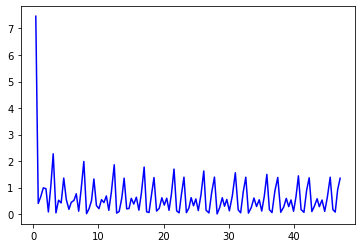

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# X axis parameter:
time_axis_1 = np.array([i[0] for i in time_arr])

# Y axis parameter:
yaxis_1 = np.array([i[1] for i in time_arr])

plt.plot(time_axis_1, yaxis_1, "b")

In [99]:
# Model accuracy
# 317, 139, 320

with torch.no_grad():
    mse = torchmetrics.MeanSquaredError()
    for i in tqdm([317, 139, 320]):
        samples = matrix_1_sc[:, i:i+40]
        print(samples.shape)
        labels = matrix_1_sc[:, i+40]
        print(labels.shape)
        for n in range(samples.shape[0]):
            label = torch.tensor(labels[n])
            sample = torch.tensor(samples[n, :])
            predictions = model(sample) # Pass samples from test to model (forward function)
            #predictions = predictions * TARGET_STD + TARGET_MEAN # What is target
            #labels = labels * TARGET_STD + TARGET_MEAN
            mse.update(predictions, label.unsqueeze(dim=0))
    

print(f"Testing mean squared error of {(mse.compute().item()):.3f}")


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

(314, 40)
(314,)


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00,  4.78it/s]

(314, 40)
(314,)
(314, 40)
(314,)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.76it/s]

Testing mean squared error of 0.029


In [103]:
# Model based on RegHD application for Single model regression -> No comparing which cluster
class SingleModel_With_NonLinear(nn.Module):
    def __init__(self, num_classes, size):
        super(SingleModel_With_NonLinear, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(1, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias

    def encode(self, x): # encoding a value
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias)
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y): # update # y = no hv
        update = self.M + self.lr * (y - (F.linear(x, self.M))) * x # Model + alpha*(Error)*(x)
        #update = update.mean(0) # Mean by columns
        self.M = update # New 

    def forward(self, x):
        enc = self.encode(x)
        res = F.linear(enc, self.M) # Multiply enc (x) * weights (Model) = Dot product
        return res # Return the resolutions
    
model = SingleModel_With_NonLinear(2, 40) # 1 class, 5
#model = model.to(device)

mse = torchmetrics.MeanSquaredError()
time_arr = []
start_time = time.time()
    
# Model training
with torch.no_grad(): # disabled gradient calculation because were doing it manually
    for _ in tqdm(range(10)): # Number of iterations for all the samples
        mse = torchmetrics.MeanSquaredError()
        for i in [234, 110, 248, 9, 93, 219, 28, 198, 203, 101, 181, 255]:
            pred = []
            samples = matrix_1_sc[:, i:i+40]
            labels = matrix_1_sc[:, i+40]
            #print(f"sample: {samples}, label:{labels}")
            #samples = samples.to(device) # pass sample and label (1 at a time)
            #labels = labels.to(device)
            
            for n in range(samples.shape[0]):
                label = torch.tensor(labels[n])
                sample = torch.tensor(samples[n, :])
                #print(x)
                #samples = 
                samples_hv = model.encode(sample) # Encode the inputs
                #print(f"sample_hv:{samples_hv}")
                model.model_update(samples_hv, label) # Pass input and label to train

                predictions_testing = model(sample) # Pass samples from test to model (forward function)
                pred.append(predictions_testing)
                #predictions_testing = predictions_testing
                #label = label
                mse.update(predictions_testing, label.unsqueeze(dim=0))
                #mse.update(predictions_testing.cpu(), label)
            
            #time_arr.append((time.time() - start_time, np.absolute(np.sum(labels-pred))))
            time_arr.append(np.absolute(np.sum(labels-pred)))
            #print(len(time_arr))

        print(f"Training mean squared error of training {(mse.compute().item()):.3f}")
        

with torch.no_grad():
    mse = torchmetrics.MeanSquaredError()
    for i in tqdm([317, 139, 320]):
        samples = matrix_1_sc[:, i:i+40]
        print(samples.shape)
        labels = matrix_1_sc[:, i+40]
        print(labels.shape)
        for n in range(samples.shape[0]):
            label = torch.tensor(labels[n])
            sample = torch.tensor(samples[n, :])
            predictions = model(sample) # Pass samples from test to model (forward function)
            #predictions = predictions * TARGET_STD + TARGET_MEAN # What is target
            #labels = labels * TARGET_STD + TARGET_MEAN
            mse.update(predictions, label.unsqueeze(dim=0))
    

print(f"Testing mean squared error of testing {(mse.compute().item()):.3f}")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\3609242651.py:64: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  time_arr.append(np.absolute(np.sum(labels-pred)))
C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\3609242651.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' wh

Training mean squared error of training 0.017



 20%|████████████████▌                                                                  | 2/10 [00:04<00:16,  2.12s/it]

Training mean squared error of training 0.011



 30%|████████████████████████▉                                                          | 3/10 [00:06<00:14,  2.06s/it]

Training mean squared error of training 0.009



 40%|█████████████████████████████████▏                                                 | 4/10 [00:08<00:12,  2.06s/it]

Training mean squared error of training 0.008



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:10<00:10,  2.04s/it]

Training mean squared error of training 0.008



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:12<00:08,  2.05s/it]

Training mean squared error of training 0.007



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:14<00:06,  2.05s/it]

Training mean squared error of training 0.006



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:16<00:04,  2.04s/it]

Training mean squared error of training 0.006



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:18<00:02,  2.06s/it]

Training mean squared error of training 0.006


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.06s/it]


Training mean squared error of training 0.005


 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  9.12it/s]

(314, 40)
(314,)
(314, 40)
(314,)
(314, 40)
(314,)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.20it/s]

Testing mean squared error of testing 0.026


In [96]:
time_arr2 = time_arr

C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\43472370.py:8: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  yaxis_2 = np.array([i[1] for i in time_arr])
C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\43472370.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yaxis_2 = np.array([i[1] for i in time_arr])


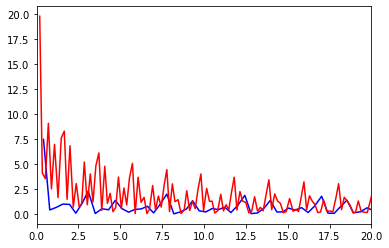

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# X axis parameter:
time_axis_2 = np.array([i[0] for i in time_arr])

# Y axis parameter:
yaxis_2 = np.array([i[1] for i in time_arr])

plt.plot(time_axis_1, yaxis_1, "b")
plt.plot(time_axis_2, yaxis_2, "r")
plt.xlim([0, 20])
plt.show()

In [15]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
import torchmetrics
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings

d=10000

# Model based on RegHD application for Single model regression -> No comparing which cluster
class SingleModel_With_NonLinear_Scroll(nn.Module):
    def __init__(self, num_classes, size):
        super(SingleModel_With_NonLinear_Scroll, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(1, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias

    def encode(self, x): # encoding a value
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias)
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y): # update # y = no hv
        update = self.M + self.lr * (y - (F.linear(x, self.M))) * x # Model + alpha*(Error)*(x)
        #update = update.mean(0) # Mean by columns
        self.M = update # New 

    def forward(self, x):
        enc = self.encode(x)
        res = F.linear(enc, self.M) # Multiply enc (x) * weights (Model) = Dot product
        return res # Return the resolutions
    
model = SingleModel_With_NonLinear_Scroll(2, 39) # 1 class, 5
#model = model.to(device)

mse = torchmetrics.MeanSquaredError()
    
# Model training
with torch.no_grad(): # disabled gradient calculation because were doing it manually
    for _ in tqdm(range(10)): # Number of iterations for all the samples
        for i in [234, 110, 248, 9, 93, 219, 28, 198, 203, 101, 181, 255]:
            samples_in = matrix_1_sc[:, i:i+39]
            labels_in = matrix_1_sc[:, i+39]
            samples_out = matrix_1_sc[:, i+1:i+40]
            labels_out = matrix_1_sc[:, i+40]
            #print(f"sample: {samples}, label:{labels}")
            #samples = samples.to(device) # pass sample and label (1 at a time)
            #labels = labels.to(device)
            
            for n in range(samples_in.shape[0]): # for each single time series
                label = torch.tensor(labels_in[n])
                sample = torch.tensor(samples_in[n, :])
                samples_hv = model.encode(sample) # Encode the inputs
                #print(f"sample_hv:{samples_hv}")
                model.model_update(samples_hv, label) # Pass input and label to train
                
                label = torch.tensor(labels_out[n])
                sample = torch.tensor(samples_out[n, :])

                predictions_testing = model(sample) # Pass samples from test to model (forward function)
                #predictions_testing = predictions_testing
                #label = label
                mse.update(predictions_testing, label.unsqueeze(dim=0))
                #mse.update(predictions_testing.cpu(), label)

        print(f"Testing mean squared error of training {(mse.compute().item()):.3f}")
        

with torch.no_grad():
    for i in tqdm([317, 139, 320]):
        samples = matrix_1_sc[:, i:i+39]
        print(samples.shape)
        labels = matrix_1_sc[:, i+39]
        print(labels.shape)
        for n in range(samples.shape[0]):
            label = torch.tensor(labels[n])
            sample = torch.tensor(samples[n, :])
            predictions = model(sample) # Pass samples from test to model (forward function)
            #predictions = predictions * TARGET_STD + TARGET_MEAN # What is target
            #labels = labels * TARGET_STD + TARGET_MEAN
            mse.update(predictions, label.unsqueeze(dim=0))
    

print(f"Testing mean squared error of testing {(mse.compute().item()):.3f}")

 10%|████████▎                                                                          | 1/10 [00:03<00:28,  3.19s/it]

Testing mean squared error of training 0.020



 20%|████████████████▌                                                                  | 2/10 [00:06<00:24,  3.05s/it]

Testing mean squared error of training 0.018



 30%|████████████████████████▉                                                          | 3/10 [00:09<00:21,  3.03s/it]

Testing mean squared error of training 0.017



 40%|█████████████████████████████████▏                                                 | 4/10 [00:12<00:18,  3.00s/it]

Testing mean squared error of training 0.016



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:15<00:15,  3.02s/it]

Testing mean squared error of training 0.015



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:18<00:12,  3.01s/it]

Testing mean squared error of training 0.015



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:21<00:09,  3.01s/it]

Testing mean squared error of training 0.015



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:24<00:05,  2.99s/it]

Testing mean squared error of training 0.015



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:27<00:03,  3.02s/it]

Testing mean squared error of training 0.014


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.02s/it]


Testing mean squared error of training 0.014


 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  6.77it/s]

(314, 39)
(314,)
(314, 39)
(314,)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.04it/s]

(314, 39)
(314,)
Testing mean squared error of testing 0.014


In [82]:
# Model based on RegHD application for Single model regression -> No comparing which cluster
class SingleModel_With_NonLinear(nn.Module):
    def __init__(self, num_classes, size):
        super(SingleModel_With_NonLinear, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(1, d) # Model initializes in 0
        self.project = embeddings.Projection(size, d) # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias

    def encode(self, x): # encoding a value
        level = embeddings.Level(1000, d, low=0, high=1) # Just because 0 - 1 with a .001 precision
        vector_hv = torch.zeros(d)
        data = torch.tensor(x) # Transform the whole time serie into tensors
        ts_hv = level(data) # Transform the whole time serie into hvs
        for i in range(len(ts_hv)): # for each hv = number in the timeseries
            for _ in range(i):
                functional.permute(ts_hv[i])
            vector_hv = functional.bundle(vector_hv, ts_hv[i])
        return functional.hard_quantize(vector_hv)

    def model_update(self, x, y): # update # y = no hv
        update = self.M + self.lr * (y - (F.linear(x, self.M))) * x # Model + alpha*(Error)*(x)
        #update = update.mean(0) # Mean by columns
        self.M = update # New 

    def forward(self, x):
        enc = self.encode(x)
        res = F.linear(enc, self.M) # Multiply enc (x) * weights (Model) = Dot product
        return res # Return the resolutions
    
model = SingleModel_With_NonLinear(2, 40) # 1 class, 5
#model = model.to(device)

mse = torchmetrics.MeanSquaredError()
time_arr = []
start_time = time.time()
    
# Model training
with torch.no_grad(): # disabled gradient calculation because were doing it manually
    for _ in range(1): # Number of iterations for all the samples
        mse = torchmetrics.MeanSquaredError()
        for i in tqdm([234, 110, 248, 9, 93, 219, 28, 198, 203, 101, 181, 255]):
            pred = []
            samples = matrix_1_sc[:, i:i+40]
            labels = matrix_1_sc[:, i+40]
            #print(f"sample: {samples}, label:{labels}")
            #samples = samples.to(device) # pass sample and label (1 at a time)
            #labels = labels.to(device)
            
            for n in range(samples.shape[0]):
                label = torch.tensor(labels[n])
                sample = torch.tensor(samples[n, :])
                #print(x)
                #samples = 
                samples_hv = model.encode(sample) # Encode the inputs
                #print(f"sample_hv:{samples_hv}")
                model.model_update(samples_hv, label) # Pass input and label to train

                predictions_testing = model(sample) # Pass samples from test to model (forward function)
                pred.append(predictions_testing)
                #predictions_testing = predictions_testing
                #label = label
                mse.update(predictions_testing, label.unsqueeze(dim=0))
                #mse.update(predictions_testing.cpu(), label)
            
            #time_arr.append((time.time() - start_time, np.absolute(np.sum(labels-pred))))
            time_arr.append(np.absolute(np.sum(labels-pred)))
            print(len(time_arr))

        print(f"Training mean squared error of training {(mse.compute().item()):.3f}")        

with torch.no_grad():
    for i in tqdm([317, 139, 320]):
        samples = matrix_1_sc[:, i:i+40]
        print(samples.shape)
        labels = matrix_1_sc[:, i+40]
        print(labels.shape)
        for n in range(samples.shape[0]):
            label = torch.tensor(labels[n])
            sample = torch.tensor(samples[n, :])
            predictions = model(sample) # Pass samples from test to model (forward function)
            #predictions = predictions * TARGET_STD + TARGET_MEAN # What is target
            #labels = labels * TARGET_STD + TARGET_MEAN
            mse.update(predictions, label.unsqueeze(dim=0))
    

print(f"Testing mean squared error of testing {(mse.compute().item()):.3f}")

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\805052351.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(x) # Transform the whole time serie into tensors
C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\805052351.py:70: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  time_arr.append(np.absolut

1



 17%|█████████████▊                                                                     | 2/12 [01:37<08:05, 48.53s/it]

2



 25%|████████████████████▊                                                              | 3/12 [02:25<07:17, 48.61s/it]

3



 33%|███████████████████████████▋                                                       | 4/12 [03:14<06:28, 48.54s/it]

4



 42%|██████████████████████████████████▌                                                | 5/12 [04:03<05:42, 48.91s/it]

5



 50%|█████████████████████████████████████████▌                                         | 6/12 [04:52<04:53, 48.92s/it]

6



 58%|████████████████████████████████████████████████▍                                  | 7/12 [05:41<04:03, 48.76s/it]

7



 67%|███████████████████████████████████████████████████████▎                           | 8/12 [06:30<03:15, 48.89s/it]

8



 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [07:19<02:26, 48.95s/it]

9



 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [08:08<01:37, 48.97s/it]

10



 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [08:57<00:48, 48.96s/it]

11


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [09:46<00:00, 48.88s/it]


12
Training mean squared error of training 0.112



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

(314, 40)
(314,)



 33%|████████████████████████████                                                        | 1/3 [00:24<00:48, 24.46s/it]

(314, 40)
(314,)



 67%|████████████████████████████████████████████████████████                            | 2/3 [00:49<00:24, 24.86s/it]

(314, 40)
(314,)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:14<00:00, 24.82s/it]

Testing mean squared error of testing 0.117


In [83]:
time_arr3 = time_arr

C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\2956605797.py:8: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  yaxis_3 = np.array([i[1] for i in time_arr])
C:\Users\ivann\AppData\Local\Temp\ipykernel_8344\2956605797.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yaxis_3 = np.array([i[1] for i in time_arr])


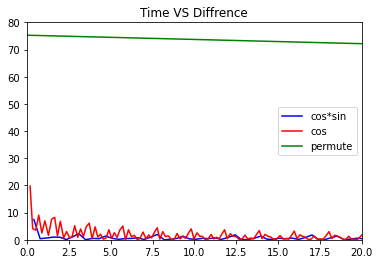

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# X axis parameter:
time_axis_3 = np.array([i[0] for i in time_arr])

# Y axis parameter:
yaxis_3 = np.array([i[1] for i in time_arr])

min_0 = time_axis_3.min()

plt.title("Time VS Diffrence")
plt.plot(time_axis_1, yaxis_1, "b")
plt.plot(time_axis_2, yaxis_2, "r")
plt.plot(time_axis_3-min_0, yaxis_3, "g")
plt.legend(["cos*sin", 'cos', "permute"])
plt.xlim([0, 20])
plt.ylim([0, 80])
plt.show()

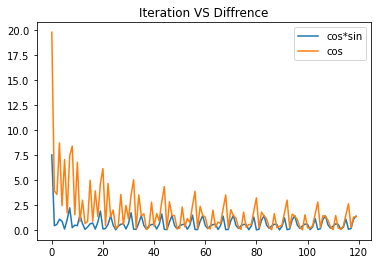

In [91]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("Iteration VS Diffrence")
plt.plot(time_arr1)
plt.plot(time_arr2)
plt.legend(["cos*sin", 'cos'])
plt.show()

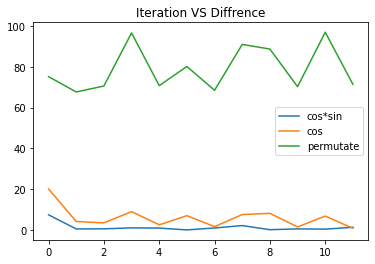

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("Iteration VS Diffrence")
plt.plot(time_arr1)
plt.plot(time_arr2)
plt.plot(time_arr3)
plt.legend(["cos*sin", 'cos', "permutate"])
plt.show()

In [15]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
import torchmetrics
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings

d=10000

# Model based on RegHD application for Single model regression -> No comparing which cluster
class SingleModel_With_NonLinear_Scroll(nn.Module):
    def __init__(self, num_classes, size):
        super(SingleModel_With_NonLinear_Scroll, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(1, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias

    def encode(self, x): # encoding a value
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias)
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y): # update # y = no hv
        update = self.M + self.lr * (y - (F.linear(x, self.M))) * x # Model + alpha*(Error)*(x)
        #update = update.mean(0) # Mean by columns
        self.M = update # New 

    def forward(self, x):
        enc = self.encode(x)
        res = F.linear(enc, self.M) # Multiply enc (x) * weights (Model) = Dot product
        return res # Return the resolutions
    
model = SingleModel_With_NonLinear_Scroll(2, 39) # 1 class, 5
#model = model.to(device)

mse = torchmetrics.MeanSquaredError()
    
# Model training
with torch.no_grad(): # disabled gradient calculation because were doing it manually
    for _ in tqdm(range(10)): # Number of iterations for all the samples
        for i in [234, 110, 248, 9, 93, 219, 28, 198, 203, 101, 181, 255]:
            samples_in = matrix_1_sc[:, i:i+39]
            labels_in = matrix_1_sc[:, i+39]
            samples_out = matrix_1_sc[:, i+1:i+40]
            labels_out = matrix_1_sc[:, i+40]
            #print(f"sample: {samples}, label:{labels}")
            #samples = samples.to(device) # pass sample and label (1 at a time)
            #labels = labels.to(device)
            
            for n in range(samples_in.shape[0]): # for each single time series
                label = torch.tensor(labels_in[n])
                sample = torch.tensor(samples_in[n, :])
                samples_hv = model.encode(sample) # Encode the inputs
                #print(f"sample_hv:{samples_hv}")
                model.model_update(samples_hv, label) # Pass input and label to train
                
                label = torch.tensor(labels_out[n])
                sample = torch.tensor(samples_out[n, :])

                predictions_testing = model(sample) # Pass samples from test to model (forward function)
                #predictions_testing = predictions_testing
                #label = label
                mse.update(predictions_testing, label.unsqueeze(dim=0))
                #mse.update(predictions_testing.cpu(), label)

        print(f"Testing mean squared error of training {(mse.compute().item()):.3f}")
        

with torch.no_grad():
    for i in tqdm([317, 139, 320]):
        samples = matrix_1_sc[:, i:i+39]
        print(samples.shape)
        labels = matrix_1_sc[:, i+39]
        print(labels.shape)
        for n in range(samples.shape[0]):
            label = torch.tensor(labels[n])
            sample = torch.tensor(samples[n, :])
            predictions = model(sample) # Pass samples from test to model (forward function)
            #predictions = predictions * TARGET_STD + TARGET_MEAN # What is target
            #labels = labels * TARGET_STD + TARGET_MEAN
            mse.update(predictions, label.unsqueeze(dim=0))
    

print(f"Testing mean squared error of testing {(mse.compute().item()):.3f}")

 10%|████████▎                                                                          | 1/10 [00:03<00:28,  3.19s/it]

Testing mean squared error of training 0.020



 20%|████████████████▌                                                                  | 2/10 [00:06<00:24,  3.05s/it]

Testing mean squared error of training 0.018



 30%|████████████████████████▉                                                          | 3/10 [00:09<00:21,  3.03s/it]

Testing mean squared error of training 0.017



 40%|█████████████████████████████████▏                                                 | 4/10 [00:12<00:18,  3.00s/it]

Testing mean squared error of training 0.016



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:15<00:15,  3.02s/it]

Testing mean squared error of training 0.015



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:18<00:12,  3.01s/it]

Testing mean squared error of training 0.015



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:21<00:09,  3.01s/it]

Testing mean squared error of training 0.015



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:24<00:05,  2.99s/it]

Testing mean squared error of training 0.015



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:27<00:03,  3.02s/it]

Testing mean squared error of training 0.014


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.02s/it]


Testing mean squared error of training 0.014


 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  6.77it/s]

(314, 39)
(314,)
(314, 39)
(314,)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.04it/s]

(314, 39)
(314,)
Testing mean squared error of testing 0.014


In [15]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
import torchmetrics
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings

d=10000

# Model based on RegHD application for Single model regression -> No comparing which cluster
class SingleModel_With_NonLinear_Scroll(nn.Module):
    def __init__(self, num_classes, size):
        super(SingleModel_With_NonLinear_Scroll, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(1, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias

    def encode(self, x): # encoding a value
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias)
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y): # update # y = no hv
        update = self.M + self.lr * (y - (F.linear(x, self.M))) * x # Model + alpha*(Error)*(x)
        #update = update.mean(0) # Mean by columns
        self.M = update # New 

    def forward(self, x):
        enc = self.encode(x)
        res = F.linear(enc, self.M) # Multiply enc (x) * weights (Model) = Dot product
        return res # Return the resolutions
    
model = SingleModel_With_NonLinear_Scroll(2, 39) # 1 class, 5
#model = model.to(device)

mse = torchmetrics.MeanSquaredError()
    
# Model training
with torch.no_grad(): # disabled gradient calculation because were doing it manually
    for _ in tqdm(range(10)): # Number of iterations for all the samples
        for i in [234, 110, 248, 9, 93, 219, 28, 198, 203, 101, 181, 255]:
            samples_in = matrix_1_sc[:, i:i+39]
            labels_in = matrix_1_sc[:, i+39]
            samples_out = matrix_1_sc[:, i+1:i+40]
            labels_out = matrix_1_sc[:, i+40]
            #print(f"sample: {samples}, label:{labels}")
            #samples = samples.to(device) # pass sample and label (1 at a time)
            #labels = labels.to(device)
            
            for n in range(samples_in.shape[0]): # for each single time series
                label = torch.tensor(labels_in[n])
                sample = torch.tensor(samples_in[n, :])
                samples_hv = model.encode(sample) # Encode the inputs
                #print(f"sample_hv:{samples_hv}")
                model.model_update(samples_hv, label) # Pass input and label to train
                
                label = torch.tensor(labels_out[n])
                sample = torch.tensor(samples_out[n, :])

                predictions_testing = model(sample) # Pass samples from test to model (forward function)
                #predictions_testing = predictions_testing
                #label = label
                mse.update(predictions_testing, label.unsqueeze(dim=0))
                #mse.update(predictions_testing.cpu(), label)

        print(f"Testing mean squared error of training {(mse.compute().item()):.3f}")
        

with torch.no_grad():
    for i in tqdm([317, 139, 320]):
        samples = matrix_1_sc[:, i:i+39]
        print(samples.shape)
        labels = matrix_1_sc[:, i+39]
        print(labels.shape)
        for n in range(samples.shape[0]):
            label = torch.tensor(labels[n])
            sample = torch.tensor(samples[n, :])
            predictions = model(sample) # Pass samples from test to model (forward function)
            #predictions = predictions * TARGET_STD + TARGET_MEAN # What is target
            #labels = labels * TARGET_STD + TARGET_MEAN
            mse.update(predictions, label.unsqueeze(dim=0))
    

print(f"Testing mean squared error of testing {(mse.compute().item()):.3f}")

 10%|████████▎                                                                          | 1/10 [00:03<00:28,  3.19s/it]

Testing mean squared error of training 0.020



 20%|████████████████▌                                                                  | 2/10 [00:06<00:24,  3.05s/it]

Testing mean squared error of training 0.018



 30%|████████████████████████▉                                                          | 3/10 [00:09<00:21,  3.03s/it]

Testing mean squared error of training 0.017



 40%|█████████████████████████████████▏                                                 | 4/10 [00:12<00:18,  3.00s/it]

Testing mean squared error of training 0.016



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:15<00:15,  3.02s/it]

Testing mean squared error of training 0.015



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:18<00:12,  3.01s/it]

Testing mean squared error of training 0.015



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:21<00:09,  3.01s/it]

Testing mean squared error of training 0.015



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:24<00:05,  2.99s/it]

Testing mean squared error of training 0.015



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:27<00:03,  3.02s/it]

Testing mean squared error of training 0.014


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.02s/it]


Testing mean squared error of training 0.014


 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  6.77it/s]

(314, 39)
(314,)
(314, 39)
(314,)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.04it/s]

(314, 39)
(314,)
Testing mean squared error of testing 0.014


In [15]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
import torchmetrics
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings

d=10000

# Model based on RegHD application for Single model regression -> No comparing which cluster
class SingleModel_With_NonLinear_Scroll(nn.Module):
    def __init__(self, num_classes, size):
        super(SingleModel_With_NonLinear_Scroll, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(1, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias

    def encode(self, x): # encoding a value
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias)
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y): # update # y = no hv
        update = self.M + self.lr * (y - (F.linear(x, self.M))) * x # Model + alpha*(Error)*(x)
        #update = update.mean(0) # Mean by columns
        self.M = update # New 

    def forward(self, x):
        enc = self.encode(x)
        res = F.linear(enc, self.M) # Multiply enc (x) * weights (Model) = Dot product
        return res # Return the resolutions
    
model = SingleModel_With_NonLinear_Scroll(2, 39) # 1 class, 5
#model = model.to(device)

mse = torchmetrics.MeanSquaredError()
    
# Model training
with torch.no_grad(): # disabled gradient calculation because were doing it manually
    for _ in tqdm(range(10)): # Number of iterations for all the samples
        for i in [234, 110, 248, 9, 93, 219, 28, 198, 203, 101, 181, 255]:
            samples_in = matrix_1_sc[:, i:i+39]
            labels_in = matrix_1_sc[:, i+39]
            samples_out = matrix_1_sc[:, i+1:i+40]
            labels_out = matrix_1_sc[:, i+40]
            #print(f"sample: {samples}, label:{labels}")
            #samples = samples.to(device) # pass sample and label (1 at a time)
            #labels = labels.to(device)
            
            for n in range(samples_in.shape[0]): # for each single time series
                label = torch.tensor(labels_in[n])
                sample = torch.tensor(samples_in[n, :])
                samples_hv = model.encode(sample) # Encode the inputs
                #print(f"sample_hv:{samples_hv}")
                model.model_update(samples_hv, label) # Pass input and label to train
                
                label = torch.tensor(labels_out[n])
                sample = torch.tensor(samples_out[n, :])

                predictions_testing = model(sample) # Pass samples from test to model (forward function)
                #predictions_testing = predictions_testing
                #label = label
                mse.update(predictions_testing, label.unsqueeze(dim=0))
                #mse.update(predictions_testing.cpu(), label)

        print(f"Testing mean squared error of training {(mse.compute().item()):.3f}")
        

with torch.no_grad():
    for i in tqdm([317, 139, 320]):
        samples = matrix_1_sc[:, i:i+39]
        print(samples.shape)
        labels = matrix_1_sc[:, i+39]
        print(labels.shape)
        for n in range(samples.shape[0]):
            label = torch.tensor(labels[n])
            sample = torch.tensor(samples[n, :])
            predictions = model(sample) # Pass samples from test to model (forward function)
            #predictions = predictions * TARGET_STD + TARGET_MEAN # What is target
            #labels = labels * TARGET_STD + TARGET_MEAN
            mse.update(predictions, label.unsqueeze(dim=0))
    

print(f"Testing mean squared error of testing {(mse.compute().item()):.3f}")

 10%|████████▎                                                                          | 1/10 [00:03<00:28,  3.19s/it]

Testing mean squared error of training 0.020



 20%|████████████████▌                                                                  | 2/10 [00:06<00:24,  3.05s/it]

Testing mean squared error of training 0.018



 30%|████████████████████████▉                                                          | 3/10 [00:09<00:21,  3.03s/it]

Testing mean squared error of training 0.017



 40%|█████████████████████████████████▏                                                 | 4/10 [00:12<00:18,  3.00s/it]

Testing mean squared error of training 0.016



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:15<00:15,  3.02s/it]

Testing mean squared error of training 0.015



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:18<00:12,  3.01s/it]

Testing mean squared error of training 0.015



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:21<00:09,  3.01s/it]

Testing mean squared error of training 0.015



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:24<00:05,  2.99s/it]

Testing mean squared error of training 0.015



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:27<00:03,  3.02s/it]

Testing mean squared error of training 0.014


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.02s/it]


Testing mean squared error of training 0.014


 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  6.77it/s]

(314, 39)
(314,)
(314, 39)
(314,)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.04it/s]

(314, 39)
(314,)
Testing mean squared error of testing 0.014


In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
import torchmetrics
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings

d=10000

# Model based on RegHD application for Single model regression -> No comparing which cluster
class SingleModel_With_NonLinear_Scroll_2(nn.Module):
    def __init__(self, num_classes, size):
        super(SingleModel_With_NonLinear_Scroll_2, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(1, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias

    def encode(self, x): # encoding a value
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias)
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y): # update # y = no hv
        update = self.M + self.lr * (y - (F.linear(x, self.M))) * x # Model + alpha*(Error)*(x)
        #update = update.mean(0) # Mean by columns
        self.M = update # New 

    def forward(self, x):
        enc = self.encode(x)
        res = F.linear(enc, self.M) # Multiply enc (x) * weights (Model) = Dot product
        return res # Return the resolutions
    
model = SingleModel_With_NonLinear_Scroll(2, 39) # 1 class, 5
#model = model.to(device)

mse = torchmetrics.MeanSquaredError()
    
# Model training
with torch.no_grad(): # disabled gradient calculation because were doing it manually
    for _ in tqdm(range(10)): # Number of iterations for all the samples
        for i in [234, 110, 248, 9, 93, 219, 28, 198, 203, 101, 181, 255]:
            samples_in = matrix_1_sc[:, i:i+39]
            labels_in = matrix_1_sc[:, i+39]
            samples_out = matrix_1_sc[:, i+1:i+40]
            labels_out = matrix_1_sc[:, i+40]
            #print(f"sample: {samples}, label:{labels}")
            #samples = samples.to(device) # pass sample and label (1 at a time)
            #labels = labels.to(device)
            
            for n in range(samples_in.shape[0]): # for each single time series
                label = torch.tensor(labels_in[n])
                sample = torch.tensor(samples_in[n, :])
                samples_hv = model.encode(sample) # Encode the inputs
                #print(f"sample_hv:{samples_hv}")
                model.model_update(samples_hv, label) # Pass input and label to train
                
                label = torch.tensor(labels_out[n])
                sample = torch.tensor(samples_out[n, :])

                predictions_testing = model(sample) # Pass samples from test to model (forward function)
                #predictions_testing = predictions_testing
                #label = label
                mse.update(predictions_testing, label.unsqueeze(dim=0))
                #mse.update(predictions_testing.cpu(), label)

        print(f"Testing mean squared error of training {(mse.compute().item()):.3f}")
        

with torch.no_grad():
    for i in tqdm([317, 139, 320]):
        samples = matrix_1_sc[:, i:i+39]
        print(samples.shape)
        labels = matrix_1_sc[:, i+39]
        print(labels.shape)
        for n in range(samples.shape[0]):
            label = torch.tensor(labels[n])
            sample = torch.tensor(samples[n, :])
            predictions = model(sample) # Pass samples from test to model (forward function)
            #predictions = predictions * TARGET_STD + TARGET_MEAN # What is target
            #labels = labels * TARGET_STD + TARGET_MEAN
            mse.update(predictions, label.unsqueeze(dim=0))
    

print(f"Testing mean squared error of testing {(mse.compute().item()):.3f}")